<a href="https://colab.research.google.com/github/lucapqg/Machine-learning/blob/main/analise_nba_clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Analise NBA



## Adquirindo os Dados





[Fonte do Código](https://towardsdatascience.com/web-scraping-nba-stats-4b4f8c525994)

In [ ]:
# importando libs
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# NBA season we will be analyzing
year = 2020
# URL page we will scraping (see image above)
url = "https://www.basketball-reference.com/playoffs/NBA_{}_per_minute.html".format(year)
# this is the HTML from the given URL
html = urlopen(url)
soup = BeautifulSoup(html)

In [ ]:
# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [ ]:
# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [ ]:
# creating the df
stats = pd.DataFrame(player_stats, columns = headers)
stats.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Jaylen Adams,PG,23,POR,3,0,21,5.1,15.4,.333,0.0,6.9,.000,5.1,8.6,.600,0.0,0.0,,1.7,3.4,5.1,3.4,1.7,0.0,0.0,1.7,10.3
1,Steven Adams,C,26,OKC,7,7,210,5.3,8.9,.596,0.0,0.2,.000,5.3,8.7,.608,1.5,3.4,.450,5.8,8.1,13.9,1.5,0.7,0.3,2.7,1.7,12.2
2,Bam Adebayo,PF,22,MIA,19,19,687,6.5,11.5,.564,0.0,0.1,.000,6.5,11.5,.566,4.7,6.0,.783,2.5,7.8,10.3,4.4,1.0,0.8,2.5,3.0,17.7
3,Jarrett Allen,C,21,BRK,4,4,132,3.8,6.5,.583,0.0,0.0,,3.8,6.5,.583,3.5,4.4,.813,4.6,11.5,16.1,2.5,0.5,1.9,3.0,1.9,11.2
4,Justin Anderson,SG,26,BRK,3,0,28,6.4,15.4,.417,6.4,14.1,.455,0.0,1.3,.000,5.1,5.1,1.000,0.0,10.3,10.3,3.9,0.0,1.3,2.6,2.6,24.4
5,Giannis Antetokounmpo,PF,25,MIL,9,9,277,11.7,20.9,.559,1.7,5.2,.325,10.0,15.7,.636,6.1,10.5,.580,3.5,12.6,16.1,6.6,0.8,1.0,3.9,4.0,31.2
6,Carmelo Anthony,PF,35,POR,5,5,176,5.7,13.9,.412,1.6,3.9,.421,4.1,10.0,.408,2.5,2.9,.857,0.2,4.9,5.1,2.0,1.0,0.4,2.7,4.1,15.5
7,OG Anunoby,SF,22,TOR,11,11,393,3.7,8.1,.455,1.6,3.8,.415,2.1,4.3,.489,1.6,2.6,.643,2.4,4.6,7.0,1.2,1.0,1.2,1.5,2.5,10.5
8,D.J. Augustin,PG,32,ORL,5,0,128,5.1,12.9,.391,2.3,4.8,.471,2.8,8.2,.345,6.2,6.5,.957,0.0,2.8,2.8,8.4,0.3,0.0,3.4,1.7,18.6
9,J.J. Barea,PG,35,DAL,1,0,5,0.0,7.2,.000,0.0,0.0,,0.0,7.2,.000,21.6,21.6,1.000,0.0,0.0,0.0,0.0,0.0,0.0,7.2,7.2,21.6


In [ ]:
# salvando o dataframe em csv
stats.to_csv('nba_playoffs_per36_stats.csv')

In [ ]:
# verificando as dimensões
stats.shape

(227, 28)

## Análise de Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

# configurando o noteebook
np.random.seed(42)
sns.set_style()

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_playoffs = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/NBA_Project/nba_playoffs_stats.csv', index_col=0)
df_playoffs

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Jaylen Adams,PG,23.0,POR,3.0,0.0,7.0,1.0,3.0,0.333,0.0,1.3,0.000,1.0,1.7,0.600,0.333,0.0,0.0,NaN,0.3,0.7,1.0,0.7,0.3,0.0,0.0,0.3,2.0
1,Steven Adams,C,26.0,OKC,7.0,7.0,30.0,4.4,7.4,0.596,0.0,0.1,0.000,4.4,7.3,0.608,0.596,1.3,2.9,0.450,4.9,6.7,11.6,1.3,0.6,0.3,2.3,1.4,10.1
2,Bam Adebayo,PF,22.0,MIA,19.0,19.0,36.2,6.5,11.6,0.564,0.0,0.1,0.000,6.5,11.5,0.566,0.564,4.7,6.1,0.783,2.5,7.8,10.3,4.4,1.0,0.8,2.5,3.1,17.8
3,Jarrett Allen,C,21.0,BRK,4.0,4.0,33.0,3.5,6.0,0.583,0.0,0.0,NaN,3.5,6.0,0.583,0.583,3.3,4.0,0.813,4.3,10.5,14.8,2.3,0.5,1.8,2.8,1.8,10.3
4,Justin Anderson,SF,26.0,BRK,3.0,0.0,9.3,1.7,4.0,0.417,1.7,3.7,0.455,0.0,0.3,0.000,0.625,1.3,1.3,1.000,0.0,2.7,2.7,1.0,0.0,0.3,0.7,0.7,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Marvin Williams,PF,33.0,MIL,10.0,0.0,17.9,2.1,4.7,0.447,1.0,2.3,0.435,1.1,2.4,0.458,0.553,0.3,0.3,1.000,1.3,3.5,4.8,0.9,0.5,0.3,0.3,1.4,5.5
223,Robert Williams,C,22.0,BOS,13.0,0.0,11.5,1.8,2.4,0.742,0.0,0.1,0.000,1.8,2.3,0.767,0.742,0.2,0.5,0.333,1.7,2.2,3.9,0.8,0.2,0.5,0.5,1.4,3.7
224,Nigel Williams-Goss,PG,25.0,UTA,1.0,0.0,2.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
225,Delon Wright,SG,27.0,DAL,4.0,0.0,13.3,1.5,2.5,0.600,0.3,0.5,0.500,1.3,2.0,0.625,0.650,0.8,1.3,0.600,0.3,0.5,0.8,1.8,1.3,0.0,1.3,0.5,4.0


## Dicionário de Variáveis
## Per Game Stats

* Pos -- Position
* Age -- Player's age on February 1 of the season
* Tm -- Team
* G -- Games
* GS -- Games Started
* MP -- Minutes Played Per Game
* FG -- Field Goals Per Game
* FGA -- Field Goal Attempts Per Game
* FG% -- Field Goal Percentage
* 3P -- 3-Point Field Goals Per Game
* 3PA -- 3-Point Field Goal Attempts Per Game
* 3P% -- 3-Point Field Goal Percentage
* 2P -- 2-Point Field Goals Per Game
* 2PA -- 2-Point Field Goal Attempts Per Game
* 2P% -- 2-Point Field Goal Percentage
* eFG% -- Effective Field Goal Percentage. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
* FT -- Free Throws Per Game
* FTA -- Free Throw Attempts Per Game
* FT% -- Free Throw Percentage
* ORB -- Offensive Rebounds Per Game
* DRB -- Defensive Rebounds Per Game
* TRB -- Total Rebounds Per Game
* AST -- Assists Per Game
* STL -- Steals Per Game
* BLK -- Blocks Per Game
* TOV -- Turnovers Per Game
* PF -- Personal Fouls Per Game
* PTS -- Points Per Game

## Advanced Stats
* Pos -- Position
* Age -- Player's age on February 1 of the season
* Tm -- Team
* G -- Games
* MP -- Minutes Played
* PER -- Player Efficiency Rating. A measure of per-minute production standardized such that the league average is 15.
* TS% -- True Shooting Percentage. A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
* 3PAr -- 3-Point Attempt Rate
Percentage of FG Attempts from 3-Point Range
* FTr -- Free Throw Attempt Rate
Number of FT Attempts Per FG Attempt
* ORB% -- Offensive Rebound Percentage. An estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
* DRB% -- Defensive Rebound Percentage .An estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.
* TRB% -- Total Rebound Percentage .An estimate of the percentage of available rebounds a player grabbed while he was on the floor.
* AST% -- Assist Percentage .An estimate of the percentage of teammate field goals a player assisted while he was on the floor.
* STL% -- Steal Percentage. An estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
* BLK% -- Block Percentage. An estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
* TOV% -- Turnover Percentage. An estimate of turnovers committed per 100 plays.
* USG% -- Usage Percentage. An estimate of the percentage of team plays used by a player while he was on the floor.
* OWS -- Offensive Win Shares. An estimate of the number of wins contributed by a player due to his offense.
* DWS -- Defensive Win Shares. An estimate of the number of wins contributed by a player due to his defense.
* WS -- Win Shares. An estimate of the number of wins contributed by a player.
* WS/48 -- Win Shares Per 48 Minutes. An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)
* OBPM -- Offensive Box Plus/Minus. A box score estimate of the offensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
* DBPM -- Defensive Box Plus/Minus. A box score estimate of the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
* BPM -- Box Plus/Minus. A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.
* VORP -- Value over Replacement Player. A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.

Multiply by 2.70 to convert to wins over replacement.


In [ ]:
# verificando as entradas
df_stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23.0,MIA,2.0,0.0,6.5,0.5,1.0,0.500,0.0,0.0,NaN,0.5,1.0,0.500,0.500,0.0,0.0,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,1.0,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [ ]:
# renomeando as colunas
df_stats.rename(columns={'FG%': 'FGper', '3P%': '3Pper', 'eFG%': 'eFGper', 'FT%':'FTper'}, inplace=True)

In [ ]:
# distribuição estatística dos dados dos jogadores
print('DISTRIBUIÇÃO ESTATÍSTICA DOS JOGADORES')
df_stats.describe()

DISTRIBUIÇÃO ESTATÍSTICA DOS JOGADORES


,Age,G,GS,MP,FG,FGA,FGper,3P,3PA,3Pper,2P,2PA,2P%,eFGper,FT,FTA,FTper,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,651.000000,651.00000,651.000000,651.000000,651.000000,651.000000,649.000000,651.000000,651.000000,616.000000,651.000000,651.000000,645.000000,649.000000,651.000000,651.000000,618.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,25.763441,38.21659,17.537634,19.179724,3.097849,6.861444,0.442891,0.938863,2.695392,0.313438,2.160829,4.167435,0.507447,0.506704,1.337788,1.750538,0.743769,0.817051,2.748694,3.563287,1.843932,0.617665,0.398157,1.101075,1.740092,8.461290
std,4.024840,22.94443,23.022124,9.060972,2.222285,4.667673,0.111526,0.849802,2.191573,0.133521,1.777765,3.284642,0.124870,0.110181,1.338949,1.658084,0.150642,0.727948,1.841340,2.429509,1.698073,0.406082,0.409010,0.807703,0.819891,6.197278
min,19.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,15.50000,0.000000,12.000000,1.400000,3.400000,0.399000,0.300000,1.000000,0.270750,0.850000,1.800000,0.459000,0.475000,0.500000,0.700000,0.667000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.600000,1.100000,3.800000
50%,25.000000,41.00000,4.000000,18.500000,2.500000,5.600000,0.439000,0.800000,2.300000,0.339000,1.600000,3.100000,0.509000,0.518000,0.900000,1.300000,0.770500,0.600000,2.400000,3.100000,1.300000,0.600000,0.300000,0.900000,1.700000,6.800000
75%,28.000000,59.00000,29.500000,26.700000,4.300000,9.400000,0.486000,1.400000,3.800000,0.378250,2.900000,5.500000,0.569000,0.557000,1.700000,2.300000,0.836000,1.100000,3.650000,4.650000,2.200000,0.900000,0.500000,1.400000,2.300000,11.650000
max,43.000000,74.00000,73.000000,37.500000,10.900000,22.900000,1.000000,4.400000,12.400000,1.000000,9.600000,18.700000,1.000000,1.000000,10.200000,11.800000,1.000000,4.600000,11.400000,15.800000,10.200000,2.100000,2.900000,4.800000,5.000000,34.300000


In [ ]:
# verificando média de idade por time
df_stats.groupby(['Tm']).Age.mean().sort_values(ascending=False)

Tm
HOU    28.761905
MIL    28.529412
LAL    28.100000
DAL    26.894737
LAC    26.700000
MIA    26.619048
TOT    26.566667
SAS    26.333333
SAC    26.173913
BRK    26.166667
ORL    26.000000
UTA    25.900000
PHI    25.894737
ATL    25.761905
POR    25.526316
DET    25.454545
TOR    25.444444
WAS    25.260870
MEM    24.952381
NYK    24.941176
CHO    24.937500
IND    24.882353
NOP    24.882353
DEN    24.761905
CLE    24.619048
GSW    24.590909
BOS    24.588235
OKC    24.555556
MIN    24.541667
CHI    24.176471
PHO    24.157895
Name: Age, dtype: float64

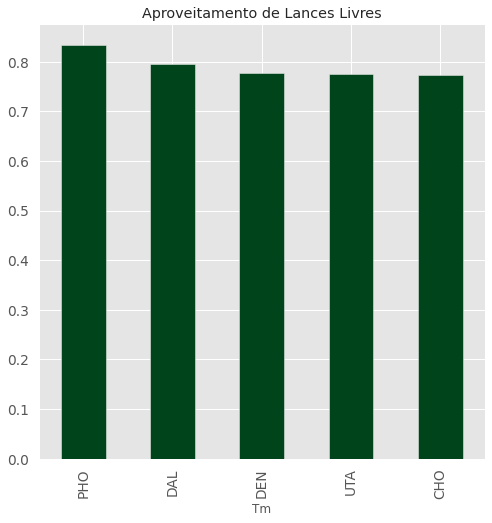

In [ ]:
# times por aproveitamento de FT
df_stats.groupby(['Tm']).FTper.mean().sort_values(ascending=False)
# plotando barras
fig, ax = plt.subplots(figsize=(8,8))
plt.title('Aproveitamento de Lances Livres')
df_stats.groupby('Tm').FTper.mean().sort_values(ascending=False)[:5].plot(kind='bar', colormap='Greens_r');

In [ ]:
# criando dataset do Phoenix Suns
pho = df_stats[df_stats['Tm'] == 'PHO']
pho.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGper,3P,3PA,3Pper,2P,2PA,2P%,eFGper,FT,FTA,FTper,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
23,Deandre Ayton,C,21.0,PHO,38.0,32.0,32.5,8.2,14.9,0.546,0.1,0.3,0.231,8.1,14.6,0.553,0.548,1.8,2.3,0.753,3.9,7.6,11.5,1.9,0.7,1.5,2.1,3.1,18.2
36,Aron Baynes,C,33.0,PHO,42.0,28.0,22.2,4.4,9.1,0.480,1.4,4.0,0.351,3.0,5.1,0.582,0.558,1.3,1.8,0.747,1.7,4.0,5.6,1.6,0.2,0.5,1.2,3.4,11.5
66,Jonah Bolden,PF,24.0,PHO,3.0,0.0,11.0,0.7,2.7,0.250,0.0,1.0,0.000,0.7,1.7,0.400,0.250,0.7,0.7,1.000,1.0,1.7,2.7,0.0,0.7,0.7,0.0,2.0,2.0
70,Devin Booker,SG,23.0,PHO,70.0,70.0,35.9,9.0,18.3,0.489,2.0,5.7,0.354,6.9,12.6,0.549,0.544,6.7,7.3,0.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6
80,Mikal Bridges,SF,23.0,PHO,73.0,32.0,28.0,3.4,6.6,0.510,1.0,2.7,0.361,2.4,4.0,0.610,0.583,1.4,1.7,0.844,0.9,3.1,4.0,1.8,1.4,0.6,1.0,2.2,9.1


In [ ]:
# carregando os dados avançados
df_adv = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/NBA_Project/nba_adv_stats.csv', index_col=0)
# renomeando as colunas
df_adv.rename(columns={'ORB%': 'ORBper', 'DRB%': 'DRBper', 
                       'TRB%': 'TRBper', 'AST%': 'ASTper',
                       'STL%': 'STLper', 'BLK%': 'BLKper',
                       'TOV%': 'TOVper', 'USG%': 'USGper'}, inplace=True)
df_adv['OD_delta'] = df_adv['OWS'] - df_adv['DWS']
df_adv[['Player', 'OD_delta']]

,Player,OD_delta
0,Steven Adams,1.1
1,Bam Adebayo,0.7
2,LaMarcus Aldridge,1.6
3,Kyle Alexander,0.0
4,Nickeil Alexander-Walker,-1.1
...,...,...
672,Trae Young,4.7
673,Cody Zeller,1.0
674,Tyler Zeller,0.0
675,Ante Žižić,0.1


In [ ]:
# criando dados avançados para o time Phoenix Suns
pho_adv = df_adv[df_adv['Tm'] == 'PHO']
pho_adv.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORBper,DRBper,TRBper,ASTper,STLper,BLKper,TOVper,USGper,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,OD_delta
23,Deandre Ayton,C,21.0,PHO,38.0,1236.0,20.0,0.568,0.023,0.157,13.0,26.3,19.6,9.7,1.0,4.1,11.6,23.7,NaN,1.5,1.6,3.1,0.121,NaN,0.8,-0.4,0.4,0.7,-0.1
36,Aron Baynes,C,33.0,PHO,42.0,934.0,15.2,0.581,0.441,0.197,8.3,20.0,14.1,10.9,0.5,2.1,10.8,21.1,NaN,1.3,0.8,2.1,0.107,NaN,-0.2,-0.8,-1.0,0.2,0.5
66,Jonah Bolden,PF,24.0,PHO,3.0,33.0,7.9,0.338,0.375,0.250,10.0,17.0,13.5,0.0,2.9,5.3,0.0,11.4,NaN,0.0,0.1,0.0,0.054,NaN,-6.5,0.2,-6.3,0.0,-0.1
70,Devin Booker,SG,23.0,PHO,70.0,2512.0,20.6,0.618,0.310,0.397,1.3,12.0,6.6,30.0,0.9,0.6,14.9,30.0,NaN,6.0,1.5,7.5,0.143,NaN,3.4,-1.3,2.2,2.6,4.5
80,Mikal Bridges,SF,23.0,PHO,73.0,2042.0,12.9,0.620,0.401,0.252,3.5,12.4,7.9,8.6,2.4,2.0,12.0,12.7,NaN,2.5,2.3,4.8,0.113,NaN,-0.6,1.5,0.8,1.5,0.2


In [ ]:
# juntando os datasets, axis=0 padrão
df = pd.concat([pho, pho_adv], axis=1)
df = df.loc[:,~df.columns.duplicated()]
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGper,3P,3PA,3Pper,2P,2PA,2P%,eFGper,FT,FTA,FTper,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORBper,DRBper,TRBper,ASTper,STLper,BLKper,TOVper,USGper,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,OD_delta
23,Deandre Ayton,C,21.0,PHO,38.0,32.0,32.5,8.2,14.9,0.546,0.1,0.3,0.231,8.1,14.6,0.553,0.548,1.8,2.3,0.753,3.9,7.6,11.5,1.9,0.7,1.5,2.1,3.1,18.2,20.0,0.568,0.023,0.157,13.0,26.3,19.6,9.7,1.0,4.1,11.6,23.7,NaN,1.5,1.6,3.1,0.121,NaN,0.8,-0.4,0.4,0.7,-0.1
36,Aron Baynes,C,33.0,PHO,42.0,28.0,22.2,4.4,9.1,0.480,1.4,4.0,0.351,3.0,5.1,0.582,0.558,1.3,1.8,0.747,1.7,4.0,5.6,1.6,0.2,0.5,1.2,3.4,11.5,15.2,0.581,0.441,0.197,8.3,20.0,14.1,10.9,0.5,2.1,10.8,21.1,NaN,1.3,0.8,2.1,0.107,NaN,-0.2,-0.8,-1.0,0.2,0.5
66,Jonah Bolden,PF,24.0,PHO,3.0,0.0,11.0,0.7,2.7,0.250,0.0,1.0,0.000,0.7,1.7,0.400,0.250,0.7,0.7,1.000,1.0,1.7,2.7,0.0,0.7,0.7,0.0,2.0,2.0,7.9,0.338,0.375,0.250,10.0,17.0,13.5,0.0,2.9,5.3,0.0,11.4,NaN,0.0,0.1,0.0,0.054,NaN,-6.5,0.2,-6.3,0.0,-0.1
70,Devin Booker,SG,23.0,PHO,70.0,70.0,35.9,9.0,18.3,0.489,2.0,5.7,0.354,6.9,12.6,0.549,0.544,6.7,7.3,0.919,0.4,3.8,4.2,6.5,0.7,0.3,3.8,3.0,26.6,20.6,0.618,0.310,0.397,1.3,12.0,6.6,30.0,0.9,0.6,14.9,30.0,NaN,6.0,1.5,7.5,0.143,NaN,3.4,-1.3,2.2,2.6,4.5
80,Mikal Bridges,SF,23.0,PHO,73.0,32.0,28.0,3.4,6.6,0.510,1.0,2.7,0.361,2.4,4.0,0.610,0.583,1.4,1.7,0.844,0.9,3.1,4.0,1.8,1.4,0.6,1.0,2.2,9.1,12.9,0.620,0.401,0.252,3.5,12.4,7.9,8.6,2.4,2.0,12.0,12.7,NaN,2.5,2.3,4.8,0.113,NaN,-0.6,1.5,0.8,1.5,0.2


In [ ]:
print('Phoenix Shape', pho.shape)
print('Phoenix Advanced Shape', pho_adv.shape)
print('Phoenix Completo', df.shape)

Phoenix Shape (19, 29)
Phoenix Advanced Shape (19, 29)
Phoenix Completo (19, 52)


In [ ]:
df.describe()

,Age,G,GS,MP,FG,FGA,FGper,3P,3PA,3Pper,2P,2PA,2P%,eFGper,FT,FTA,FTper,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORBper,DRBper,TRBper,ASTper,STLper,BLKper,TOVper,USGper,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,OD_delta
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,0.0,19.000000,19.000000,19.000000,19.000000,0.0,19.000000,19.000000,19.000000,19.000000,19.000000
mean,24.157895,39.473684,19.210526,19.236842,3.215789,7.015789,0.421895,0.878947,2.531579,0.278105,2.347368,4.500000,0.503211,0.476895,1.442105,1.736842,0.834444,0.852632,2.726316,3.578947,1.973684,0.610526,0.357895,1.068421,1.836842,8.726316,11.852632,0.519895,0.390211,0.229474,4.868421,14.347368,9.557895,12.521053,1.510526,1.436842,10.594737,18.436842,NaN,1.173684,0.863158,2.036842,0.061684,NaN,-1.715789,-0.610526,-2.315789,0.489474,0.310526
std,3.077935,24.669749,24.548317,10.220090,2.544550,4.878440,0.107895,0.738301,1.745805,0.158229,2.159055,3.909106,0.092909,0.125993,1.538873,1.742989,0.098921,0.870101,1.933001,2.684436,2.189582,0.425434,0.350104,0.956296,1.027516,6.856533,6.108770,0.112729,0.156060,0.108532,4.108400,6.384736,4.561715,10.025444,0.907313,1.357371,5.450532,4.383835,NaN,1.506594,0.762460,2.126084,0.092226,NaN,3.272319,1.639748,4.482220,0.718714,1.087757
min,19.000000,3.000000,0.000000,2.700000,0.300000,1.300000,0.200000,0.000000,0.100000,0.000000,0.300000,0.700000,0.333000,0.200000,0.000000,0.000000,0.678000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,-5.300000,0.250000,0.021000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.400000,NaN,-0.300000,0.000000,0.000000,-0.249000,NaN,-10.100000,-5.600000,-15.700000,-0.200000,-0.600000
25%,22.500000,19.500000,0.000000,10.800000,1.250000,3.150000,0.389000,0.050000,0.900000,0.255500,0.800000,1.850000,0.433000,0.425000,0.700000,0.700000,0.750750,0.350000,1.350000,1.650000,0.850000,0.350000,0.150000,0.600000,1.100000,3.650000,8.250000,0.470500,0.373500,0.149500,2.350000,11.050000,6.900000,7.300000,0.950000,0.550000,8.900000,16.200000,NaN,0.000000,0.250000,0.100000,0.037500,NaN,-3.050000,-0.700000,-3.700000,0.000000,-0.100000
50%,24.000000,42.000000,3.000000,19.900000,3.100000,6.600000,0.435000,1.000000,2.700000,0.351000,1.900000,3.000000,0.511000,0.517000,0.800000,1.000000,0.844000,0.700000,2.400000,3.300000,1.600000,0.600000,0.300000,0.800000,1.900000,8.800000,12.900000,0.560000,0.401000,0.238000,3.500000,13.400000,8.400000,10.800000,1.400000,1.100000,11.600000,17.800000,NaN,0.800000,0.700000,1.400000,0.093000,NaN,-0.600000,-0.300000,-0.500000,0.200000,0.000000
75%,25.000000,57.500000,32.000000,26.350000,4.250000,8.800000,0.482500,1.350000,3.600000,0.359000,2.800000,5.000000,0.560500,0.556000,1.600000,2.100000,0.869750,0.950000,3.900000,4.600000,1.900000,0.750000,0.450000,1.350000,2.550000,11.200000,15.450000,0.589000,0.441500,0.295500,6.800000,18.550000,13.050000,16.250000,2.200000,1.900000,14.150000,21.050000,NaN,1.700000,1.500000,3.350000,0.115000,NaN,0.200000,0.150000,0.500000,0.700000,0.400000
max,33.000000,73.000000,70.000000,35.900000,9.000000,18.300000,0.648000,2.000000,5.700000,0.517000,8.100000,14.600000,0.667000,0.651000,6.700000,7.300000,1.000000,3.900000,7.600000,11.500000,8.800000,1.400000,1.500000,3.800000,3.400000,26.600000,20.600000,0.688000,0.672000,0.400000,14.600000,26.300000,19.600000,39.700000,3.200000,5.300000,17.900000,30.000000,NaN,6.000000,2.300000,7.500000,0.143000,NaN,3.400000,1.500000,2.200000,2.600000,4.500000


In [ ]:
print('Média de Win Share da NBA:',df_adv.WS.mean())
print('Jogador com melhor Win Share: ', df_adv.WS.max())
print(df_adv[df_adv['WS'] == 13.1])
df[['Player','WS','PER','PTS']].sort_values(by='WS', ascending=False)

Média de Win Share da NBA: 1.7714285714285711
Jogador com melhor Win Share:  13.1
           Player Pos   Age   Tm     G  ...  OBPM  DBPM  BPM  VORP  OD_delta
266  James Harden  SG  30.0  HOU  68.0  ...   8.1   1.6  9.6   7.3       6.7

[1 rows x 29 columns]


,Player,WS,PER,PTS
70,Devin Booker,7.5,20.6,26.6
550,Ricky Rubio,4.9,16.5,13.0
80,Mikal Bridges,4.8,12.9,9.1
496,Kelly Oubre Jr.,3.8,14.9,18.7
557,Dario Šarić,3.6,14.2,10.7
23,Deandre Ayton,3.1,20.0,18.2
337,Cameron Johnson,2.7,12.9,8.8
36,Aron Baynes,2.1,15.2,11.5
114,Jevon Carter,1.8,11.3,4.9
354,Frank Kaminsky,1.4,14.2,9.7


In [ ]:
df_adv[['Player','WS','PER','Age']].sort_values(by='WS', ascending=False)[:20]

,Player,WS,PER,Age
266,James Harden,13.1,29.1,30.0
390,Damian Lillard,11.6,26.9,29.0
168,Anthony Davis,11.1,27.4,26.0
12,Giannis Antetokounmpo,11.1,31.9,25.0
237,Rudy Gobert,10.7,21.7,27.0
331,LeBron James,9.8,25.5,35.0
347,Nikola Jokić,9.8,24.9,24.0
103,Jimmy Butler,9.0,23.6,30.0
507,Chris Paul,8.9,21.7,34.0
183,Luka Dončić,8.8,27.6,20.0


### Insights
* Comparar com salário para definir valor de jogadores, decidir trocas, descobrir oportunidades.
* Entender como outros podem contribuir mais
* Entender o que contribui para esse número.

In [ ]:
print('Média de PER da NBA:',df_adv.PER.mean())
print('Jogador com melhor PER: ', df_adv.PER.max())
print(df_adv[df_adv['PER'] == 33.2])
df[['Player','PER', 'PTS']].sort_values(by='PER', ascending=False)

Média de PER da NBA: 12.728110599078327
Jogador com melhor PER:  33.2
             Player Pos   Age   Tm    G  ...  OBPM  DBPM   BPM  VORP  OD_delta
157  Jamal Crawford  SG  39.0  BRK  1.0  ...  12.4   2.6  15.0   0.0       0.1

[1 rows x 29 columns]


,Player,PER,PTS
70,Devin Booker,20.6,26.6
23,Deandre Ayton,20.0,18.2
550,Ricky Rubio,16.5,13.0
176,Cheick Diallo,16.5,4.7
508,Cameron Payne,15.7,10.9
36,Aron Baynes,15.2,11.5
496,Kelly Oubre Jr.,14.9,18.7
354,Frank Kaminsky,14.2,9.7
557,Dario Šarić,14.2,10.7
80,Mikal Bridges,12.9,9.1


### Insights
Quanto ao PER, é importante ressaltar que o jogador com maior PER pode não ser o melhor.

In [ ]:
df_adv[['Player','WS','PER','Age']].sort_values(by='PER', ascending=False)[:20]

,Player,WS,PER,Age
157,Jamal Crawford,0.1,33.2,39.0
517,Shamorie Ponds,0.1,33.1,21.0
12,Giannis Antetokounmpo,11.1,31.9,25.0
580,Max Strus,0.0,30.7,23.0
266,James Harden,13.1,29.1,30.0
107,Devontae Cacok,0.0,28.6,23.0
457,Johnathan Motley,0.3,28.5,24.0
209,Tacko Fall,0.2,28.4,24.0
183,Luka Dončić,8.8,27.6,20.0
168,Anthony Davis,11.1,27.4,26.0


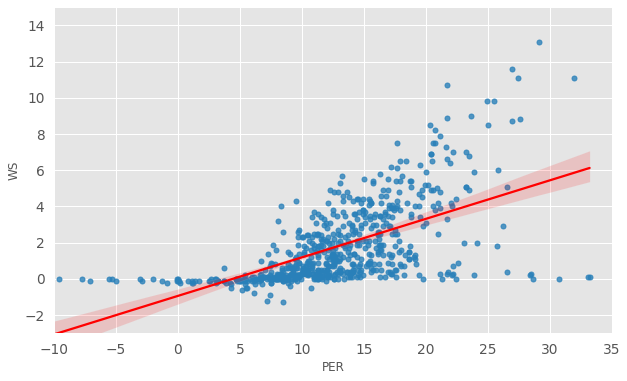

In [ ]:
# scatter plot and linear regression
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(left=-10, right=35)
ax.set_ylim(bottom=-3, top=15)
sns.regplot('PER', 'WS', scatter_kws={"s": 25},line_kws={"color": "red"}, data=df_adv, ax=ax,color='#2980B9');

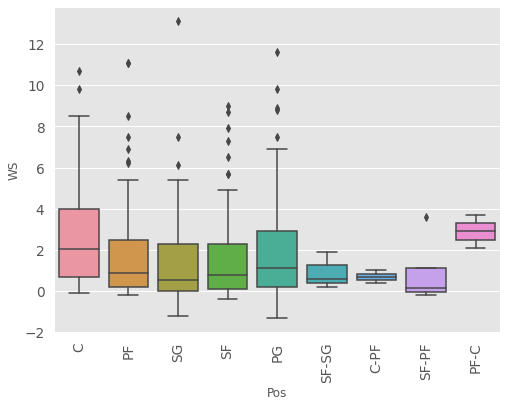

In [ ]:
# boxplots
var = 'Pos'
data = pd.concat([df_adv['WS'], df_adv[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="WS", data=data)
plt.xticks(rotation=90);

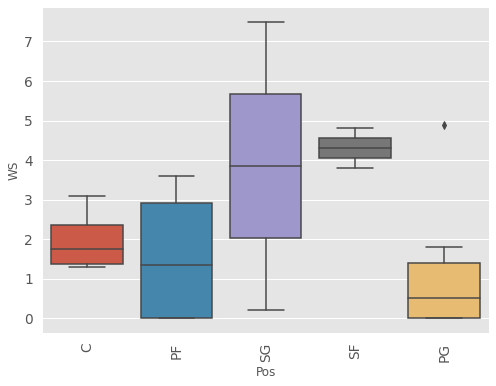

In [ ]:
# boxplots
var = 'Pos'
data = pd.concat([df['WS'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="WS", data=data)
plt.xticks(rotation=90);

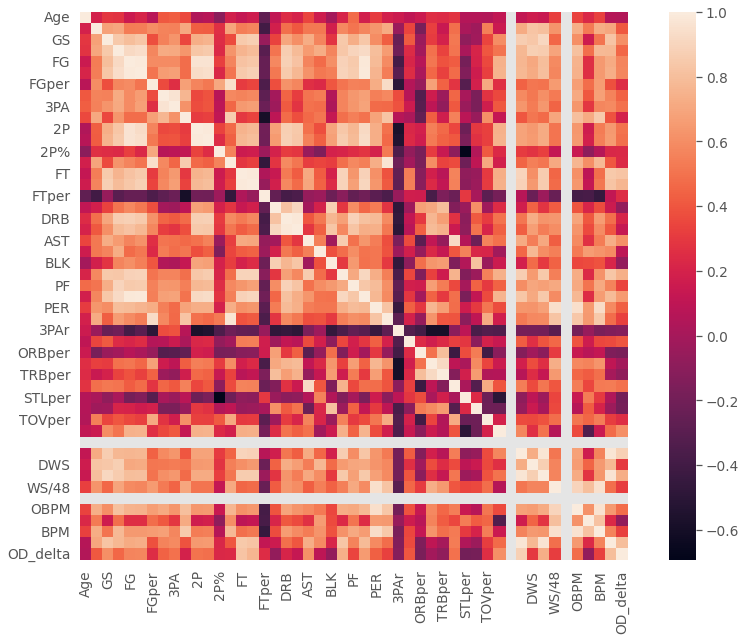

In [ ]:
# criando uma matriz de correlação
corr = df.corr()

# plotando o heatmap
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, fmt='.2f', square=True, linecolor='white', vmax=1.0, annot=False);
plt.tight_layout()

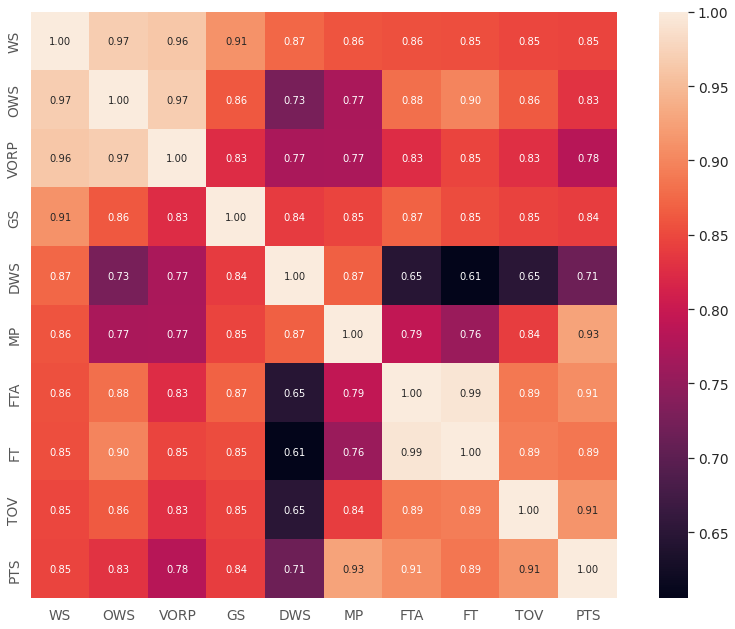

In [ ]:
# número de variáveis a serem selecionadas
k = 10

# encontrando as variáveis mais correlacionadas
cols = corr.nlargest(k, 'WS')['WS'].index
cm = np.corrcoef(df[cols].values.T)

# plotando heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

### Insights
* TOV com correlação positiva. Indicador de volume de jogo, não da importância do stat.
* Importância de FT correlacionada com James Harden.
* MP, GS e VORP relacionada aos jogadores titulares. Volume de jogo = WS.

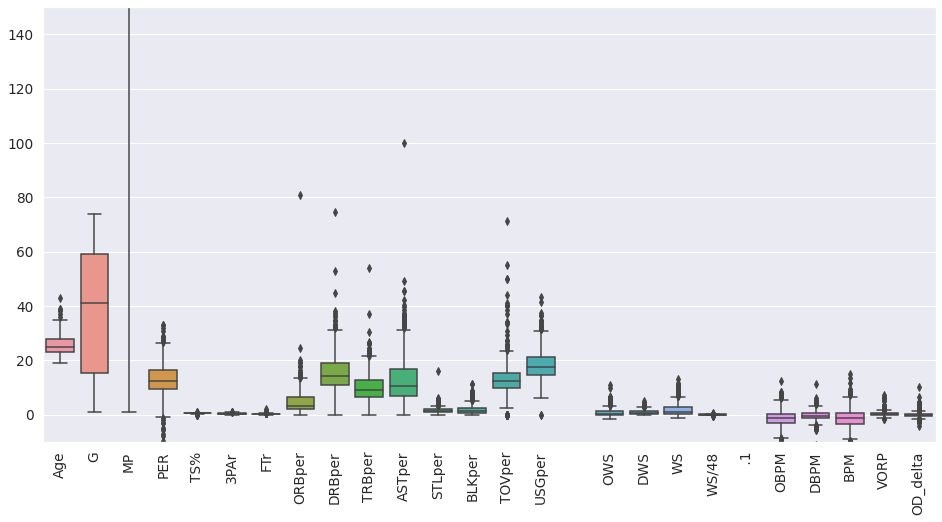

In [ ]:
# boxplots
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(data=df_adv)
fig.axis(ymin=-10, ymax=150);
plt.xticks(rotation=90);

In [ ]:
# identificando os outliers
q1 = df_adv.OD_delta.quantile(.25)
q3 = df_adv.OD_delta.quantile(.75)
IQR = q3 - q1
print('IQR da variável price: ', IQR)

# definindo os limites                                       
sup = q3 + 1.5 * IQR
inf = q1 - 1.5 * IQR

print('Limite superior de price: ', sup)
print('Limite inferior de price: ', inf)

IQR da variável price:  0.7
Limite superior de price:  1.3499999999999996
Limite inferior de price:  -1.4499999999999997


In [ ]:
# definindo outliers ofensivos
outliers_off = df_adv[df_adv['OD_delta'] > 1.3499999999999996]
outliers_off[['Player','OD_delta']].sort_values(by='OD_delta', ascending=False)[:10]

,Player,OD_delta
390,Damian Lillard,10.2
266,James Harden,6.7
672,Trae Young,4.7
175,DeMar DeRozan,4.6
70,Devin Booker,4.5
183,Luka Dončić,4.2
41,Bradley Beal,3.9
347,Nikola Jokić,3.6
103,Jimmy Butler,3.6
530,J.J. Redick,3.0


In [ ]:
# outliers defensivos
outliers_def = df_adv[df_adv['OD_delta'] < -1.4499999999999997]
outliers_def[['Player','OD_delta']].sort_values(by='OD_delta', ascending=True)[:10]

,Player,OD_delta
634,Taurean Prince,-4.0
189,Andre Drummond,-3.0
30,RJ Barrett,-2.7
393,Brook Lopez,-2.7
190,Andre Drummond,-2.6
37,Kent Bazemore,-2.4
671,Thaddeus Young,-2.3
150,Robert Covington,-2.3
161,Jarrett Culver,-2.3
182,Donte DiVincenzo,-2.2


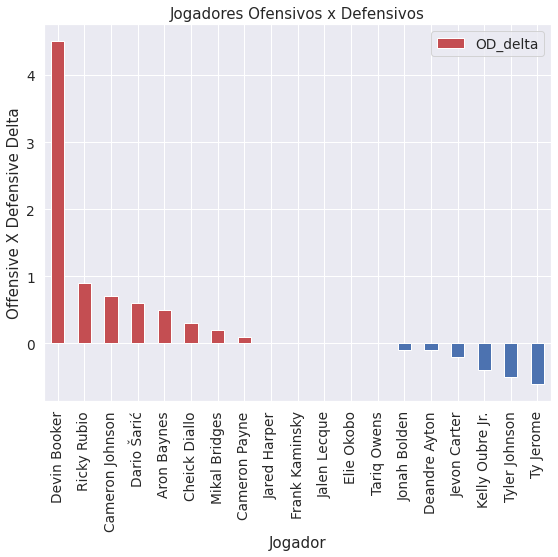

In [ ]:
# jogadores ofensivos x defensivos
fig, ax = plt.subplots(figsize=(8,8))

df['off'] = df['OD_delta'] > 0.0
df_od = df.sort_values(by='OD_delta', ascending=False)
df_od.plot(x='Player',y='OD_delta', kind='bar', ax=ax, color=df_od.off.map({True: 'r', False: 'b'}))
ax.set_title("Jogadores Ofensivos x Defensivos")
ax.set_ylabel("Offensive X Defensive Delta")
ax.set_xlabel("Jogador")

plt.tight_layout()



In [ ]:
# verificando OD_delta
df_od[['Player','OD_delta']]

,Player,OD_delta
70,Devin Booker,4.5
550,Ricky Rubio,0.9
337,Cameron Johnson,0.7
557,Dario Šarić,0.6
36,Aron Baynes,0.5
176,Cheick Diallo,0.3
80,Mikal Bridges,0.2
508,Cameron Payne,0.1
270,Jared Harper,0.0
354,Frank Kaminsky,0.0


## K-Means Clustering

In [ ]:
# valores faltantes
print((df_adv.isnull().sum() / df_adv.shape[0]).sort_values(ascending=False))

 .1         1.000000
            1.000000
TS%         0.041359
3PAr        0.041359
TOVper      0.041359
FTr         0.041359
OD_delta    0.038405
TRBper      0.038405
Pos         0.038405
Age         0.038405
Tm          0.038405
G           0.038405
MP          0.038405
PER         0.038405
ORBper      0.038405
DRBper      0.038405
STLper      0.038405
ASTper      0.038405
VORP        0.038405
BLKper      0.038405
USGper      0.038405
OWS         0.038405
DWS         0.038405
WS          0.038405
WS/48       0.038405
OBPM        0.038405
DBPM        0.038405
BPM         0.038405
Player      0.038405
dtype: float64


In [ ]:
# verificando o dataset
df_adv.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORBper,DRBper,TRBper,ASTper,STLper,BLKper,TOVper,USGper,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP,OD_delta
0,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,0.421,14.0,24.0,19.2,13.2,1.5,3.4,14.2,17.3,NaN,3.8,2.7,6.5,0.185,NaN,1.9,1.1,2.9,2.1,1.1
1,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,0.484,8.5,24.9,17.0,24.2,1.7,3.8,17.6,21.2,NaN,4.6,3.9,8.5,0.168,NaN,1.4,2.0,3.4,3.3,0.7
2,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,0.241,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.4,NaN,3.0,1.4,4.5,0.122,NaN,1.8,-0.5,1.4,1.5,1.6
3,Kyle Alexander,PF,23.0,MIA,2.0,13.0,4.7,0.500,0.000,0.000,17.9,8.3,12.9,0.0,0.0,0.0,33.3,10.2,NaN,0.0,0.0,0.0,-0.003,NaN,-6.1,-3.5,-9.6,0.0,0.0
4,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,591.0,8.9,0.473,0.500,0.139,1.6,13.5,7.5,21.1,1.3,1.1,16.1,23.3,NaN,-0.7,0.4,-0.2,-0.020,NaN,-3.2,-1.4,-4.6,-0.4,-1.1


In [ ]:
# removendo colunas desnecessárias
cols = [18,23]
df_adv.drop(df_adv.columns[cols],axis=1,inplace=True)

In [ ]:
# preenchendo valores ausentes
df_adv.fillna(value=0, inplace=True)

In [ ]:
df_cat = df_adv.iloc[:, [0,1,3]]
df_num = df_adv.drop(columns=['Player', 'Pos', 'Tm'])
cols = df_num.columns

In [ ]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# transformando
scaled = pd.DataFrame(scaler.fit_transform(df_num))
scaled.columns = cols

### Elbow Method

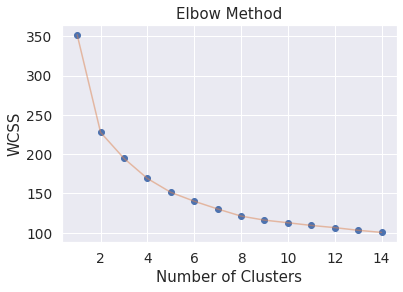

In [ ]:
from sklearn.cluster import KMeans

# finding out the proper number of clusters
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [ ]:
# verificar os resultados
wcss

[351.98217545163476,
 227.7659639834288,
 194.65582974928725,
 169.09599619552267,
 151.44371053734852,
 140.1527232961806,
 130.29411765476686,
 121.24185614832797,
 116.09959468592729,
 112.79251816250311,
 109.36247250899521,
 106.58467217512504,
 103.18807452186462,
 100.47778171862399]

In [ ]:
# diferença entre os elementos (9)
dif = np.diff(wcss)
dif

array([-124.21621147,  -33.11013423,  -25.55983355,  -17.65228566,
        -11.29098724,   -9.85860564,   -9.05226151,   -5.14226146,
         -3.30707652,   -3.43004565,   -2.77780033,   -3.39659765,
         -2.7102928 ])

### Model



In [ ]:
# instanciando o modelo
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

In [ ]:
# verificando o resultado
y_kmeans

array([4, 4, 6, 7, 0, 0, 4, 5, 5, 1, 8, 1, 4, 7, 7, 8, 2, 8, 8, 0, 5, 8,
       3, 6, 0, 7, 2, 6, 5, 2, 8, 2, 0, 0, 7, 5, 0, 8, 0, 0, 8, 2, 8, 0,
       5, 0, 7, 7, 5, 0, 5, 5, 5, 3, 8, 8, 6, 6, 6, 2, 2, 2, 2, 7, 1, 1,
       1, 7, 1, 8, 4, 6, 1, 0, 8, 6, 3, 1, 1, 7, 2, 8, 1, 5, 2, 8, 8, 5,
       2, 7, 0, 8, 8, 6, 0, 0, 5, 5, 2, 8, 5, 3, 0, 4, 7, 7, 7, 7, 8, 5,
       6, 5, 1, 5, 8, 0, 6, 0, 8, 6, 6, 7, 7, 0, 1, 7, 5, 5, 5, 6, 3, 0,
       5, 5, 6, 2, 5, 0, 7, 5, 1, 5, 6, 7, 8, 8, 0, 7, 7, 7, 2, 8, 5, 0,
       0, 1, 8, 5, 2, 8, 5, 8, 2, 3, 5, 0, 0, 1, 4, 7, 8, 0, 0, 7, 0, 4,
       6, 0, 6, 6, 7, 2, 2, 4, 0, 0, 0, 0, 2, 6, 6, 7, 3, 0, 8, 0, 1, 0,
       4, 8, 0, 5, 7, 0, 0, 1, 0, 1, 5, 7, 6, 7, 8, 0, 0, 2, 8, 2, 2, 3,
       5, 1, 5, 2, 0, 1, 7, 6, 2, 8, 8, 8, 8, 2, 6, 6, 2, 4, 0, 2, 0, 2,
       3, 0, 0, 5, 2, 1, 1, 8, 0, 8, 0, 8, 0, 5, 5, 0, 1, 8, 1, 7, 7, 7,
       5, 2, 4, 8, 8, 5, 1, 3, 4, 8, 2, 2, 6, 8, 7, 1, 6, 2, 6, 7, 7, 7,
       0, 0, 5, 7, 8, 1, 0, 2, 2, 8, 0, 5, 3, 7, 8,

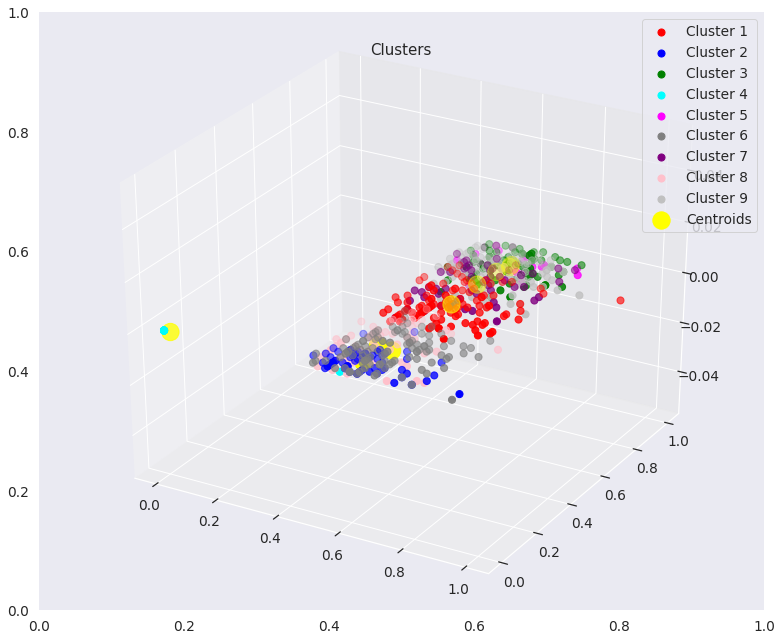

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
scaled = scaled.values
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(scaled[y_kmeans == 6,0], scaled[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(scaled[y_kmeans == 7,0], scaled[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')
plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= 'silver', label= 'Cluster 9')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [ ]:
# convertendo resultados em df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# previsões como df
print(kmeans.shape)
kmeans.head()

(677, 1)


,k_cluster
0,4
1,4
2,6
3,7
4,0


In [ ]:
# juntando os dfs
df_cluster = pd.concat([df_adv, kmeans], axis=1)

# verificando os dfs
print(df_cluster.shape)
df_cluster.head()

(677, 28)


,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORBper,DRBper,TRBper,ASTper,STLper,BLKper,TOVper,USGper,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,OD_delta,k_cluster
0,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,0.421,14.0,24.0,19.2,13.2,1.5,3.4,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1,1.1,4
1,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,0.484,8.5,24.9,17.0,24.2,1.7,3.8,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3,0.7,4
2,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,0.241,6.3,17.8,12.0,11.4,1.0,4.4,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5,1.6,6
3,Kyle Alexander,PF,23.0,MIA,2.0,13.0,4.7,0.500,0.000,0.000,17.9,8.3,12.9,0.0,0.0,0.0,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0,0.0,7
4,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,591.0,8.9,0.473,0.500,0.139,1.6,13.5,7.5,21.1,1.3,1.1,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4,-1.1,0


In [ ]:
# conferindo dados faltantes
(df_cluster.isnull().sum()/ df_cluster.shape[0]).sort_values(ascending=False)

k_cluster    0.0
OD_delta     0.0
Pos          0.0
Age          0.0
Tm           0.0
G            0.0
MP           0.0
PER          0.0
TS%          0.0
3PAr         0.0
FTr          0.0
ORBper       0.0
DRBper       0.0
TRBper       0.0
ASTper       0.0
STLper       0.0
BLKper       0.0
TOVper       0.0
USGper       0.0
OWS          0.0
DWS          0.0
WS           0.0
WS/48        0.0
OBPM         0.0
DBPM         0.0
BPM          0.0
VORP         0.0
Player       0.0
dtype: float64

In [ ]:
# WS por cluster
df_cluster.groupby(['k_cluster']).WS.mean().sort_values(ascending=False)

k_cluster
4    8.588000
2    4.305814
6    3.389474
8    1.990435
0    0.657522
5    0.424299
7    0.392405
3    0.000000
1   -0.067647
Name: WS, dtype: float64

In [ ]:
# número de jogadores por cluster
df_cluster['k_cluster'].value_counts()

8    115
0    113
5    107
2     86
7     79
1     68
6     57
3     27
4     25
Name: k_cluster, dtype: int64

In [ ]:
# verificando jogadores no cluster
df_cluster.loc[df_cluster['k_cluster'] == 4][:10]

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORBper,DRBper,TRBper,ASTper,STLper,BLKper,TOVper,USGper,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,OD_delta,k_cluster
0,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,0.421,14.0,24.0,19.2,13.2,1.5,3.4,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1,1.1,4
1,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,0.484,8.5,24.9,17.0,24.2,1.7,3.8,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3,0.7,4
6,Jarrett Allen,C,21.0,BRK,70.0,1852.0,20.7,0.664,0.013,0.581,12.3,24.9,18.7,8.9,1.0,4.2,11.7,14.9,5.2,2.9,8.2,0.212,1.4,1.0,2.3,2.0,2.3,4
12,Giannis Antetokounmpo,PF,25.0,MIL,63.0,1917.0,31.9,0.613,0.237,0.508,7.7,34.8,22.1,34.2,1.5,3.0,13.2,37.5,6.1,5.0,11.1,0.279,7.4,4.1,11.5,6.6,1.1,4
70,Devin Booker,SG,23.0,PHO,70.0,2512.0,20.6,0.618,0.310,0.397,1.3,12.0,6.6,30.0,0.9,0.6,14.9,30.0,6.0,1.5,7.5,0.143,3.4,-1.3,2.2,2.6,4.5,4
103,Jimmy Butler,SF,30.0,MIA,58.0,1959.0,23.6,0.585,0.157,0.693,6.3,15.4,11.0,28.1,2.6,1.6,11.4,25.1,6.3,2.7,9.0,0.221,4.0,1.5,5.4,3.7,3.6,4
168,Anthony Davis,PF,26.0,LAL,62.0,2131.0,27.4,0.610,0.199,0.479,7.4,22.1,14.8,15.1,2.0,6.0,10.4,29.3,6.7,4.4,11.1,0.250,5.4,2.6,8.0,5.4,2.3,4
175,DeMar DeRozan,SF,30.0,SAS,68.0,2316.0,21.6,0.603,0.033,0.430,2.0,15.4,8.7,26.1,1.4,0.8,11.6,26.3,5.9,1.3,7.3,0.151,2.3,-0.4,1.9,2.3,4.6,4
183,Luka Dončić,PG,20.0,DAL,61.0,2047.0,27.6,0.585,0.431,0.448,4.1,25.0,14.7,45.7,1.5,0.6,14.8,36.8,6.5,2.3,8.8,0.207,7.4,1.0,8.4,5.4,4.2,4
198,Joel Embiid,C,25.0,PHI,51.0,1506.0,25.8,0.590,0.215,0.543,10.3,33.2,21.7,16.9,1.4,3.7,13.8,32.9,3.3,2.7,6.0,0.192,3.7,1.0,4.7,2.5,0.6,4


In [ ]:
# distribuição estatística das variáveis categóricas
df_cluster.loc[df_cluster['k_cluster'] == 4].describe(include='O')

,Player,Pos,Tm
count,25,25,25
unique,25,5,18
top,Nikola Jokić,C,LAL
freq,1,9,2


In [ ]:
# jogadores do Phoenix Suns por cluster
df_cluster[df_cluster['Tm']== 'PHO']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORBper,DRBper,TRBper,ASTper,STLper,BLKper,TOVper,USGper,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,OD_delta,k_cluster
23,Deandre Ayton,C,21.0,PHO,38.0,1236.0,20.0,0.568,0.023,0.157,13.0,26.3,19.6,9.7,1.0,4.1,11.6,23.7,1.5,1.6,3.1,0.121,0.8,-0.4,0.4,0.7,-0.1,6
36,Aron Baynes,C,33.0,PHO,42.0,934.0,15.2,0.581,0.441,0.197,8.3,20.0,14.1,10.9,0.5,2.1,10.8,21.1,1.3,0.8,2.1,0.107,-0.2,-0.8,-1.0,0.2,0.5,0
66,Jonah Bolden,PF,24.0,PHO,3.0,33.0,7.9,0.338,0.375,0.250,10.0,17.0,13.5,0.0,2.9,5.3,0.0,11.4,0.0,0.1,0.0,0.054,-6.5,0.2,-6.3,0.0,-0.1,1
70,Devin Booker,SG,23.0,PHO,70.0,2512.0,20.6,0.618,0.310,0.397,1.3,12.0,6.6,30.0,0.9,0.6,14.9,30.0,6.0,1.5,7.5,0.143,3.4,-1.3,2.2,2.6,4.5,4
80,Mikal Bridges,SF,23.0,PHO,73.0,2042.0,12.9,0.620,0.401,0.252,3.5,12.4,7.9,8.6,2.4,2.0,12.0,12.7,2.5,2.3,4.8,0.113,-0.6,1.5,0.8,1.5,0.2,2
114,Jevon Carter,PG,24.0,PHO,58.0,945.0,11.3,0.563,0.601,0.111,3.5,10.5,6.9,11.9,2.4,1.6,11.2,12.9,0.8,1.0,1.8,0.093,-0.7,1.3,0.6,0.6,-0.2,8
176,Cheick Diallo,C,23.0,PHO,47.0,479.0,16.5,0.688,0.021,0.275,6.9,23.7,15.2,6.9,1.1,2.2,16.7,17.0,0.8,0.5,1.3,0.132,-1.1,-0.2,-1.3,0.1,0.3,6
270,Jared Harper,PG,22.0,PHO,3.0,8.0,-5.3,0.250,0.500,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.3,0.0,0.0,0.0,-0.249,-10.1,-5.6,-15.7,0.0,0.0,1
334,Ty Jerome,PG,22.0,PHO,31.0,328.0,7.9,0.425,0.442,0.142,2.3,13.4,7.8,18.2,2.2,0.8,13.0,17.9,-0.3,0.3,0.0,-0.003,-4.0,0.1,-3.8,-0.2,-0.6,0
337,Cameron Johnson,PF,23.0,PHO,57.0,1255.0,12.9,0.586,0.672,0.141,4.3,12.4,8.3,7.7,1.4,1.4,6.9,15.7,1.7,1.0,2.7,0.102,0.8,-0.4,0.3,0.7,0.7,8


In [ ]:
# quantidade de jogadores por cluster
df_cluster[df_cluster['Tm']== 'PHO'].k_cluster.value_counts()

0    5
2    4
1    4
8    2
6    2
5    1
4    1
Name: k_cluster, dtype: int64

In [ ]:
# statistical distribution of the data in each column, for each cluster
df_cluster.groupby("k_cluster").describe() 

Age                                   ... OD_delta                      
           count       mean       std   min   25%  ...      min  25%  50%   75%   max
k_cluster                                          ...                               
0          113.0  25.893805  4.256010  19.0  23.0  ...     -2.0 -0.8 -0.4  0.00   1.3
1           68.0  25.058824  3.866744  19.0  22.0  ...     -0.7 -0.3 -0.1 -0.10   0.0
2           86.0  26.627907  3.581148  20.0  24.0  ...     -2.7 -0.3  0.6  1.40   4.7
3           27.0   0.888889  4.618802   0.0   0.0  ...      0.0  0.0  0.0  0.00   0.0
4           25.0  26.480000  3.906405  20.0  23.0  ...     -0.5  1.1  2.3  3.60  10.2
5          107.0  26.327103  4.001829  19.0  23.0  ...     -1.2 -0.2  0.0  0.10   1.3
6           57.0  25.719298  4.043312  19.0  22.0  ...     -3.0 -0.1  0.5  1.00   2.8
7           79.0  24.101266  3.499432  19.0  22.0  ...     -0.8 -0.1  0.0  0.10   1.1
8          115.0  25.904348  4.296008  19.0  22.0  ...     -4.0 -1.2 -0.4  0.25   2.5

[9 rows x 192 columns]